# K-means clustering

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [2]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 1000
number of feature : 2


## plot the input data

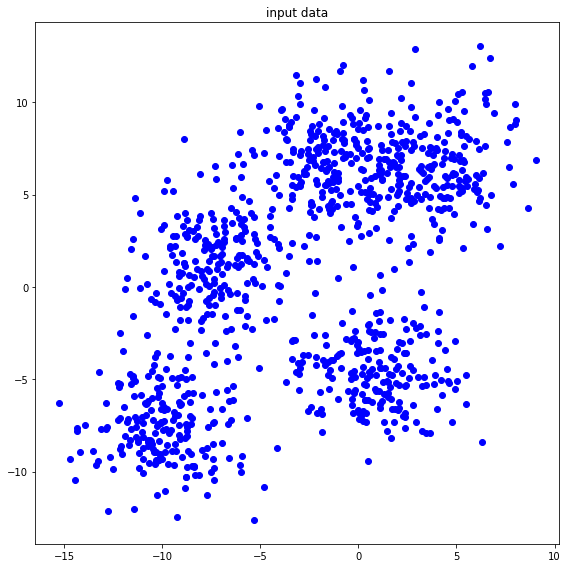

In [3]:

plt.figure(figsize=(8,8))
plt.title('input data')

plt.plot(x, y,'o', color='blue')


plt.tight_layout()
plt.show()

## compute distance
### feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
### $n$ : number of data, $m$ : number of features

In [40]:
def compute_distance(feature, center):
    distance = []
    for i in range(len(feature)):
        distance_x = (feature[i][0] - center[0]) ** 2
        distance_y = (feature[i][1] - center[1]) ** 2
        distance.append(np.sqrt(distance_x + distance_y))
    distance = np.array(distance)
    return distance

## compute centroid
### feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
### $n$ : number of data, $m$ : number of features

In [5]:
label_feature = np.zeros(number_data)         #cluster label intialize

for i in range(len(label_feature)):
    label_feature[i] = np.random.randint(0,5) # cluster 0 ~ 4

In [68]:
num_check = 0
index_storage = []
for i in range(number_data):
    if label_feature[i] == 3:
        num_check += 1
        index_storage.append(i)

cluster_feature = np.zeros(shape=(num_check, number_feature))
for i in range(num_check):
    cluster_feature[i][0] = feature[index_storage[i]][0]
    cluster_feature[i][1] = feature[index_storage[i]][1]
    
if num_check == 0:
        centroids[0] = 999999
        centroids[1] = 999999
else:
    centroids = np.mean(cluster_feature, axis = 0)

sum(compute_distance(cluster_feature, centroid[3]))*(1/num_check)

IndexError: index 3 is out of bounds for axis 0 with size 2

In [90]:
def compute_centroid(feature, label_feature, value_label):
    num_check = 0
    index_storage = []
    centroids = np.zeros((2,))
    for i in range(number_data):
        if label_feature[i] == value_label:
            num_check += 1
            index_storage.append(i)
            
    cluster_feature = np.zeros(shape=(num_check, number_feature))
    for i in range(num_check):
        cluster_feature[i][0] = feature[index_storage[i]][0]
        cluster_feature[i][1] = feature[index_storage[i]][1]
        
    if num_check == 0:
        centroids[0] = 999999
        centroids[1] = 999999
    else:
        centroids = np.mean(cluster_feature, axis = 0)
    
    loss = sum(compute_distance(cluster_feature, centroid[value_label]))*(1/num_check)
        
    return centroids, loss

In [85]:
compute_centroid(feature, label_feature, 2)

(array([-7.30035775, -3.43883063]), 1146.6865323968805)

In [8]:
label_feature = np.zeros(number_data)         #cluster label intialize

for i in range(len(label_feature)):
    label_feature[i] = np.random.randint(0,5) # cluster 0 ~ 4

## compute label
### distance : $n \times k$, label_feature : $n \times 1$
### $n$ : number of data, $k$ : number of clusters

In [9]:
def compute_label(distance):
    index_label_feature = np.zeros(number_data)

    for i in range(number_data):
        cluster = np.argmin(distance[i])
        index_label_feature[i] = cluster
    
    return index_label_feature


In [86]:
label_feature = np.zeros(number_data)         #cluster label intialize

for i in range(len(label_feature)):
    label_feature[i] = np.random.randint(0,5) # cluster 0 ~ 4

In [91]:
# ===================================================
# assign the number of clusters and iterations
number_cluster      = 5
number_iteration    = 10
# ===================================================

In [92]:
distance            = np.zeros(shape=(number_data, number_cluster))
distance.shape

(1000, 5)

In [93]:
distance            = np.zeros(shape=(number_data, number_cluster))
centroid            = np.zeros(shape=(number_cluster, number_feature))
loss_iteration      = np.zeros(shape=(number_iteration, 1))
centroid_iteration  = np.zeros(shape=(number_iteration, number_cluster, number_feature))
loss_iteration      = np.zeros(number_iteration)
initial_point = []

for i in range(number_iteration):
    distance = distance.T
    temp = 0
    for k in range(5):
        a, loss = compute_centroid(feature, label_feature, k)
        temp += loss
        if a[0] > 99999:
            continue
        centroid[k] = a
        
    loss_iteration[i]   = loss    
        
    for j in range(5):
        distance[j] = compute_distance(feature, centroid[j])
        
    distance = distance.T
    label_feature = compute_label(distance)
    centroid_iteration[i] = centroid
    print(loss_iteration[i])
    

7.851196170495881
2.451497468909365
2.4482295849387774
2.4500472347651905
2.4500472347651905
2.4500472347651905
2.4500472347651905
2.4500472347651905
2.4500472347651905
2.4500472347651905


In [14]:
centroid_iteration[1][0]

array([0.99134432, 6.50819534])

## plot the results

In [15]:
def plot_data(feature):
    
    plt.figure(figsize=(8,8))   
    plt.title('input data')

    plt.plot(x, y,'o', color='blue')

    plt.tight_layout()
    plt.show()

In [16]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('loss')
    # ===================================================
    # fill up the blank
    #
    #
    # ===================================================
    plt.tight_layout()
    plt.show()

In [17]:
centroid_iteration[0][0]

array([-1.58260297,  2.12576677])

In [18]:
centroid_iteration

array([[[-1.58260297e+00,  2.12576677e+00],
        [-2.55119585e+00,  2.36061584e-01],
        [-2.73595553e+00,  6.18851212e-01],
        [-3.56456932e+00,  6.21460483e-03],
        [-3.55577746e+00, -2.14555797e-01]],

       [[ 9.91344324e-01,  6.50819534e+00],
        [ 1.54997750e+00, -4.58220473e+00],
        [-3.83617097e+00,  2.12528412e+00],
        [-7.66931524e+00,  1.93328861e+00],
        [-8.43938013e+00, -6.16431740e+00]],

       [[ 1.66960510e+00,  6.84555128e+00],
        [ 1.00692264e+00, -4.64521490e+00],
        [-3.74784356e+00,  2.88889151e+00],
        [-8.00256334e+00,  1.54914908e+00],
        [-9.75963378e+00, -7.34767724e+00]],

       [[ 2.02631515e+00,  6.90938548e+00],
        [ 9.16856603e-01, -4.59353809e+00],
        [-3.63536326e+00,  4.21165740e+00],
        [-8.03803016e+00,  1.11430301e+00],
        [-9.86048003e+00, -7.49938861e+00]],

       [[ 2.67401932e+00,  6.87432213e+00],
        [ 9.00142752e-01, -4.57770976e+00],
        [-3.21177764e+00

In [19]:
centroid_iteration[:,0][:,0]

array([-1.58260297,  0.99134432,  1.6696051 ,  2.02631515,  2.67401932,
        3.12547363,  3.40115034,  3.6251222 ,  3.78431722,  3.84121791])

In [20]:
centroid_iteration[:,0]

array([[-1.58260297,  2.12576677],
       [ 0.99134432,  6.50819534],
       [ 1.6696051 ,  6.84555128],
       [ 2.02631515,  6.90938548],
       [ 2.67401932,  6.87432213],
       [ 3.12547363,  6.71340135],
       [ 3.40115034,  6.59875551],
       [ 3.6251222 ,  6.50043872],
       [ 3.78431722,  6.52458962],
       [ 3.84121791,  6.53503908]])

In [21]:
centroid0_iteration

NameError: name 'centroid0_iteration' is not defined

In [27]:
centroid_iteration.shape

(10, 5, 2)

In [28]:

def plot_centroid(centroid_iteration, number_cluster):



    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('centroid')
    

    plt.plot(centroid_iteration[:, 0][:,0], centroid_iteration[:, 0][:,1], '-', color='red', label= 'cluster = 0')
    plt.plot(centroid_iteration[:, 1][:,0], centroid_iteration[:, 1][:,1], '-', color='green', label= 'cluster = 1')
    plt.plot(centroid_iteration[:, 2][:,0], centroid_iteration[:, 2][:,1], '-', color='blue', label= 'cluster = 2')
    plt.plot(centroid_iteration[:, 3][:,0], centroid_iteration[:, 3][:,1],  '-', color='yellow', label= 'cluster = 3')
    plt.plot(centroid_iteration[:, 4][:,0], centroid_iteration[:, 4][:,1],  '-', color='orange', label= 'cluster = 4')

    
    plt.legend(loc="center right")
    plt.tight_layout()
    plt.show()

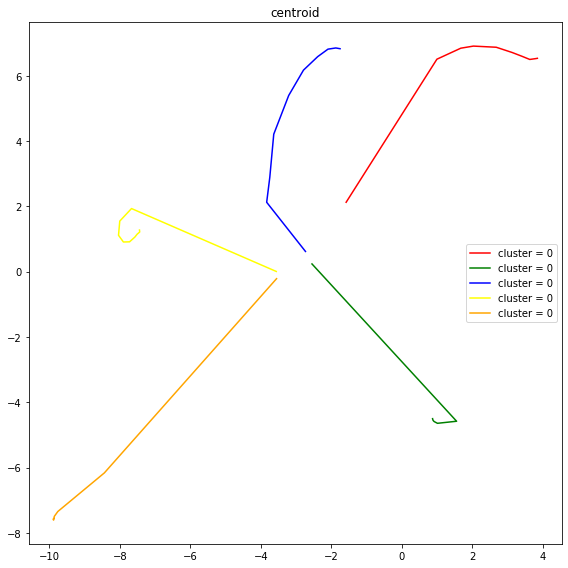

In [29]:
plot_centroid(centroid_iteration, 5)

In [30]:
def plot_cluster(feature, label_feature):
    color_num = 5
    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('cluster')
    plt.scatter(x,y, c = label_feature, cmap = plt.cm.get_cmap('rainbow', color_num), alpha = 0.5)
    plt.colorbar(ticks = range(color_num), format = '%d', label = 'cluster')
    
    plt.tight_layout()
    plt.show()


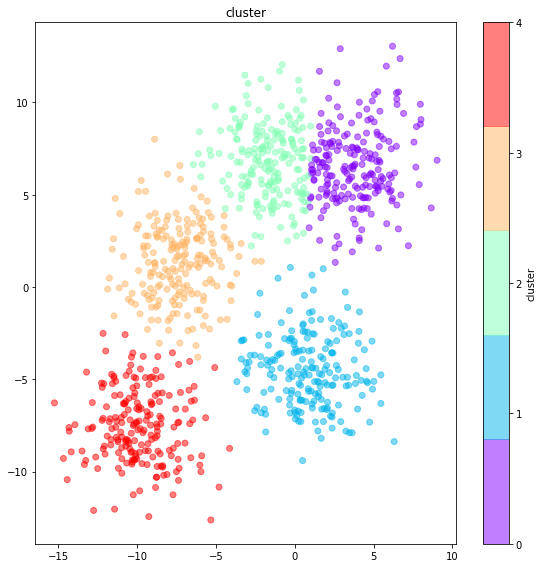

In [31]:
plot_cluster(feature, label_feature)

***

# results

***

1. plot the input data

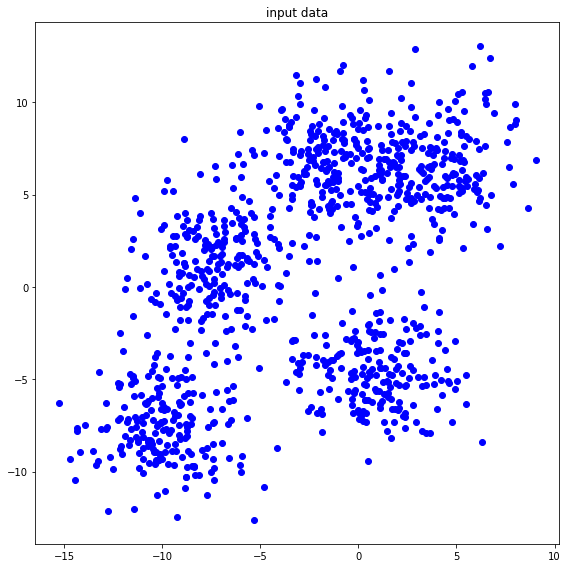

In [24]:
plot_data(feature)

***

2. plot the loss over the iterations with the number of clusters being 5

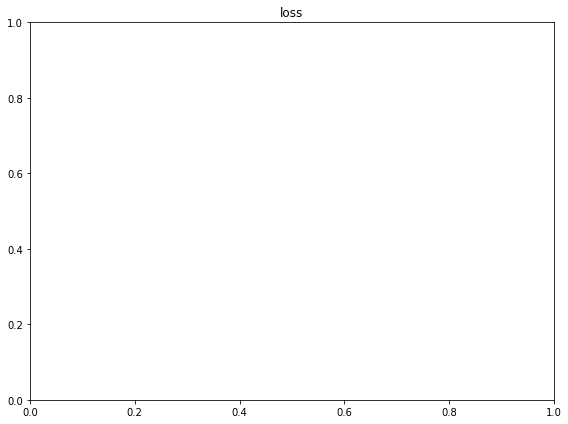

In [25]:
plot_loss_curve(loss_iteration)

***

3. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 5

In [26]:
plot_centroid(centroid_iteration)

NameError: name 'plot_centroid' is not defined

***

4. plot the final clustering result with the number of clusters being 5

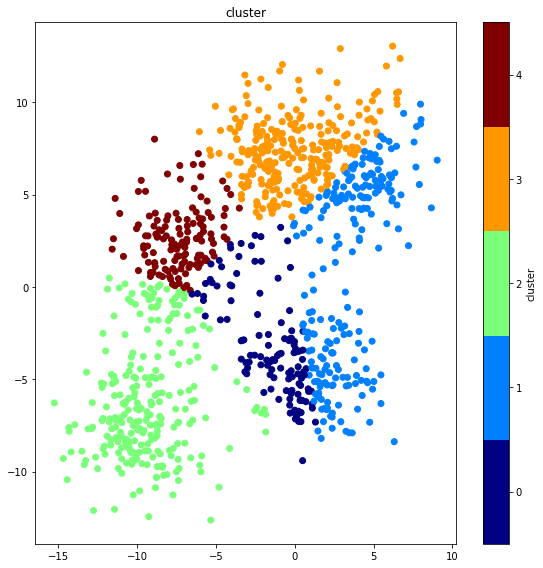

In [90]:
plot_cluster(feature, label_feature, label_cluster)

***

5. plot the loss over the iterations with the number of clusters being 10

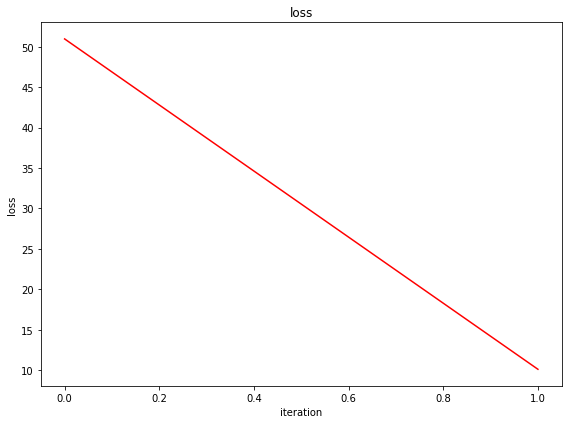

In [97]:
plot_loss_curve(loss_iteration)

***

6. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 10

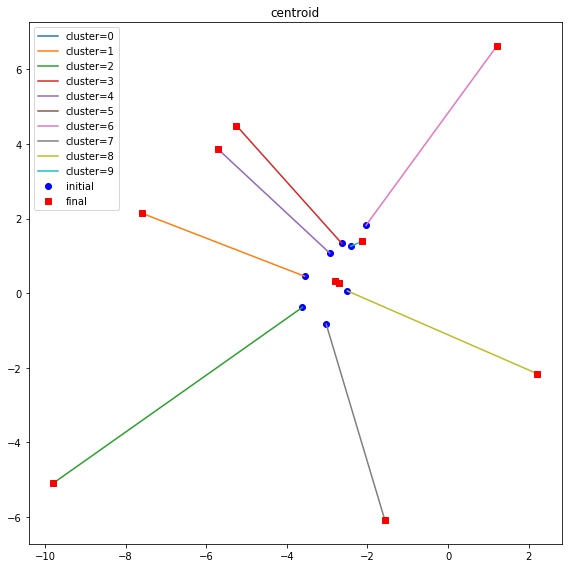

In [98]:
plot_centroid(centroid_iteration)

***

7. plot the final clustering result with the number of clusters being 10

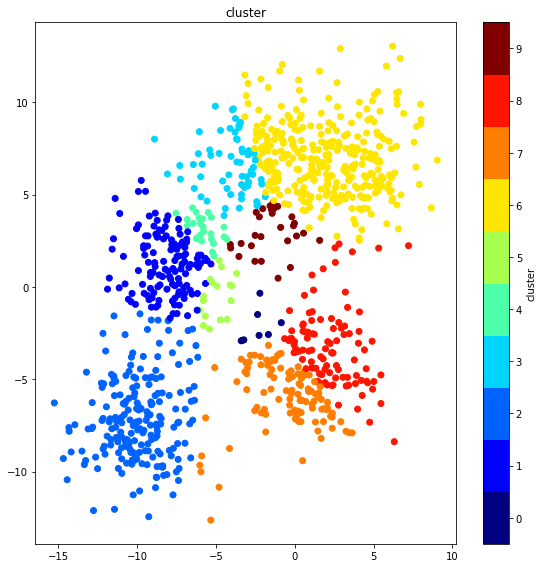

In [99]:
plot_cluster(feature, label_feature, label_cluster)

***